In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("preprocessed_redditData-removedtopic.csv")

In [21]:
# Group by year and game (subreddit), count number of posts
popularity_df = df.groupby(["year", "subreddit"]).size().reset_index(name="post_count")

# Pivot to wide format: rows = years, columns = games
popularity_pivot = popularity_df.pivot(index="year", columns="subreddit", values="post_count").fillna(0)

C:\Users\Ghastly\AppData\Local\Temp\ipykernel_28632\4139575566.py:6: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\School Files\ITS132L\redditwebscraping\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


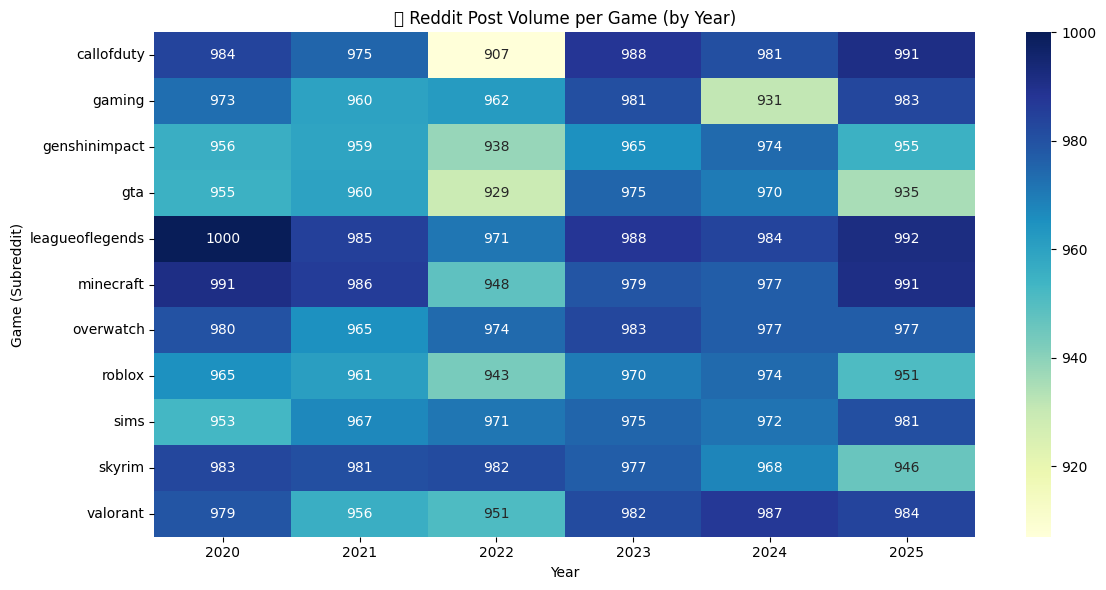

In [22]:
plt.figure(figsize=(12, 6))
sns.heatmap(popularity_pivot.T, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("📊 Reddit Post Volume per Game (by Year)")
plt.xlabel("Year")
plt.ylabel("Game (Subreddit)")
plt.tight_layout()
plt.show()

In [23]:
top_games_by_year = (
    popularity_df.sort_values(["year", "post_count"], ascending=[True, False])
    .groupby("year")
    .head(5)  # top 5 games per year
)

for year in sorted(top_games_by_year["year"].unique()):
    top_games = top_games_by_year[top_games_by_year["year"] == year]
    print(f"\n📅 Top Games in {year}")
    print(top_games[["subreddit", "post_count"]])


📅 Top Games in 2020
         subreddit  post_count
4  leagueoflegends        1000
5        minecraft         991
0       callofduty         984
9           skyrim         983
6        overwatch         980

📅 Top Games in 2021
          subreddit  post_count
16        minecraft         986
15  leagueoflegends         985
20           skyrim         981
11       callofduty         975
19             sims         967

📅 Top Games in 2022
          subreddit  post_count
31           skyrim         982
28        overwatch         974
26  leagueoflegends         971
30             sims         971
23           gaming         962

📅 Top Games in 2023
          subreddit  post_count
33       callofduty         988
37  leagueoflegends         988
39        overwatch         983
43         valorant         982
34           gaming         981

📅 Top Games in 2024
          subreddit  post_count
54         valorant         987
48  leagueoflegends         984
44       callofduty         981
49   